## **COGNORISE INFOTECH PROJECT**

**VISHNU R NAIR**

# **BREAST CANCER CLASSIFICATION**

Aim:To build a classification model to classify breast cancer tumors as malignant or benign

**Importing Necessary Packages and Modules**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,recall_score,precision_score,roc_curve,auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importing Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CognoRise_InfoTech/BREAST CANCER CLASSIFICATION/data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Checking for Missing Values**

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Dropping Uncessary Columns**

In [ ]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

**Checking For Duplicate Rows**

In [ ]:
df.duplicated().sum()

0

**Text to Numberic**

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)



*   M-malignant-1
*   B-benign-0



In [ ]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

# **DATA VISUALISATION**

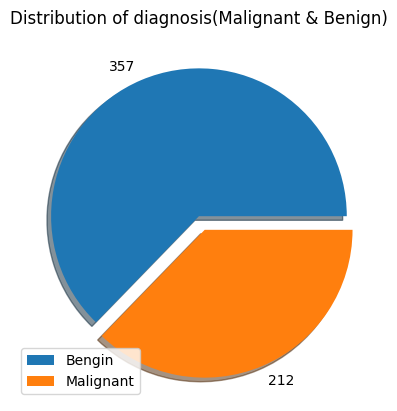

In [ ]:
#Distribution of diagnosis
plt.title("Distribution of diagnosis(Malignant & Benign)")
plt.pie(df['diagnosis'].value_counts(),labels=df['diagnosis'].value_counts(),shadow=True,explode=[0,0.1])
plt.legend(['Bengin','Malignant'],loc='lower left')
plt.show()

**CORRELATION**

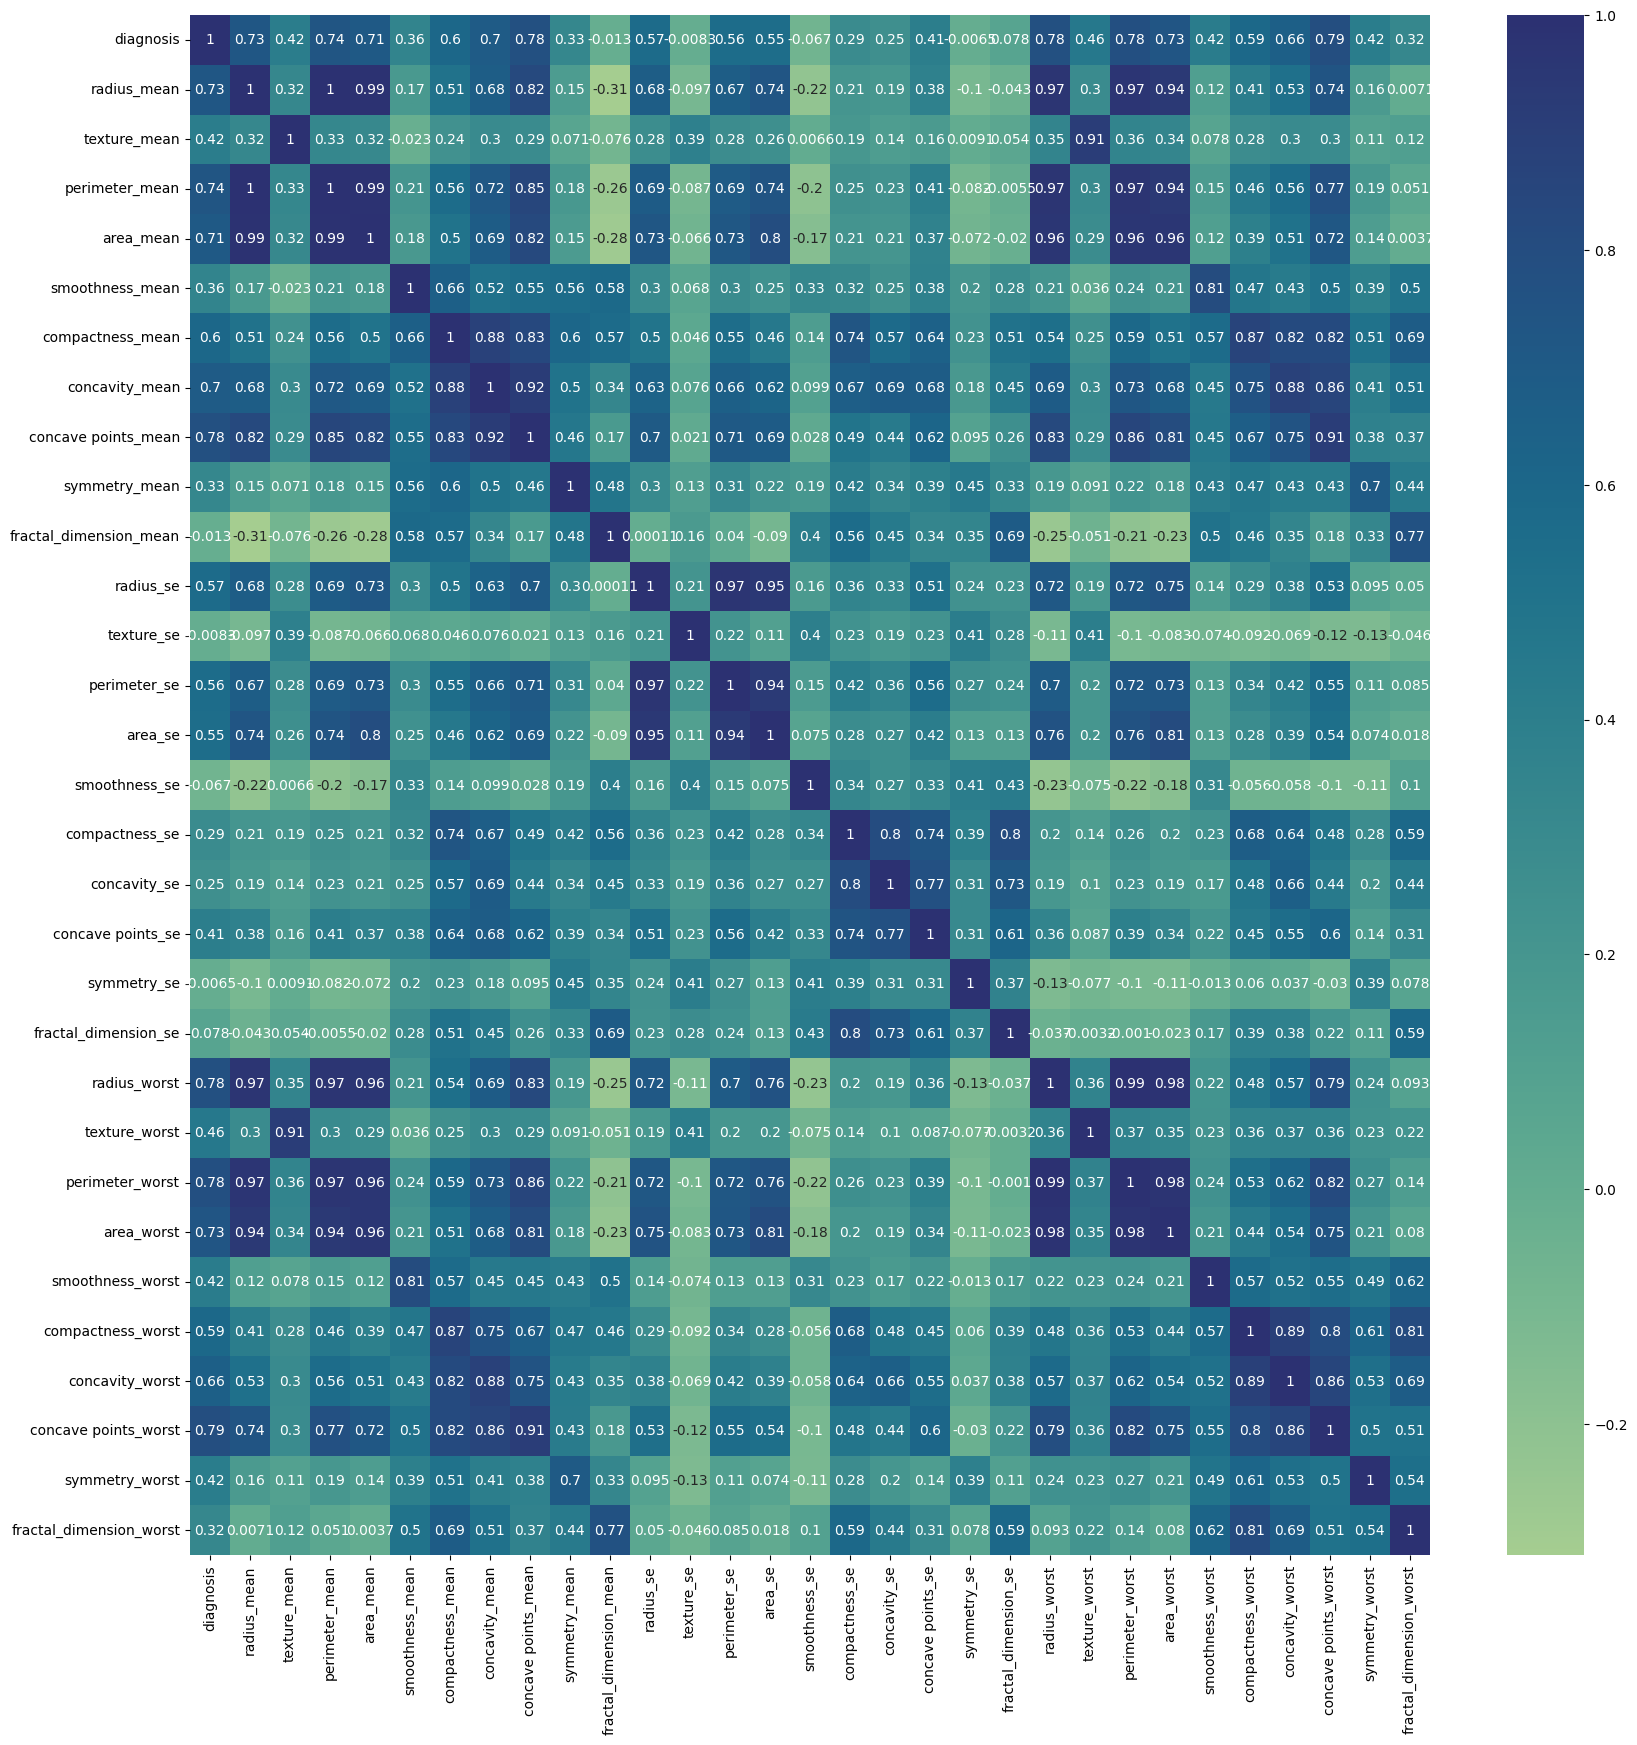

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

**FEATURE SELECTION**

In [ ]:
df.drop(['smoothness_se','fractal_dimension_mean','texture_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

**Splitting Independent and Dependent Variables**

In [ ]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

**FEATURE SCALING**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

**TRAN TEST SPLIT**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)



---



**Creating Object and Calculating performance metrics**

-------------------- KNeighborsClassifier --------------------
Accuracy Score :  0.9649122807017544
Precision Score:  0.9672131147540983
Recall Score   :  0.9365079365079365


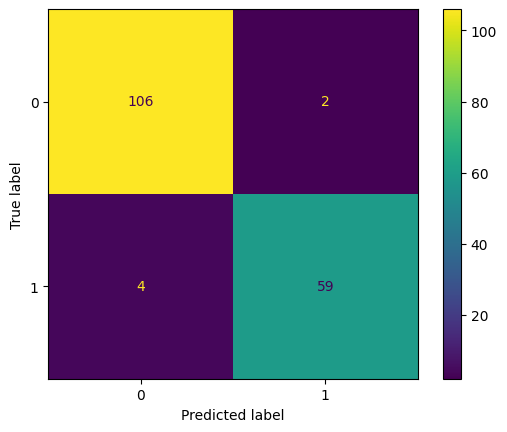

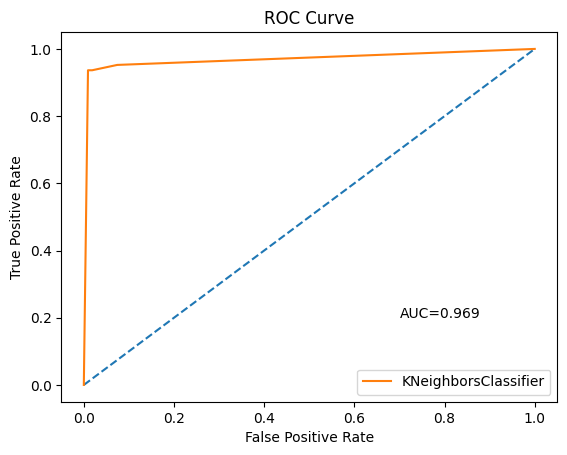



-------------------- RandomForestClassifier --------------------
Accuracy Score :  0.9590643274853801
Precision Score:  0.9666666666666667
Recall Score   :  0.9206349206349206


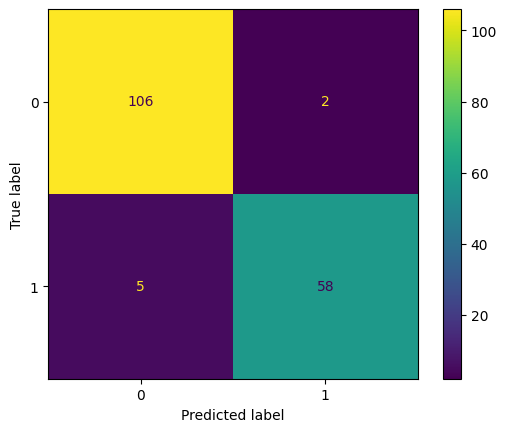

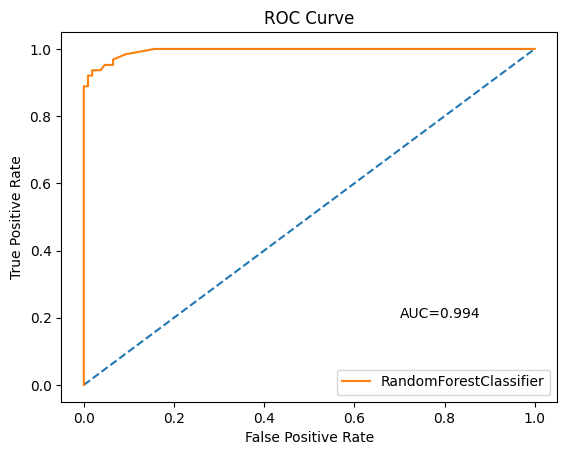



-------------------- DecisionTreeClassifier --------------------
Accuracy Score :  0.9532163742690059
Precision Score:  0.9104477611940298
Recall Score   :  0.9682539682539683


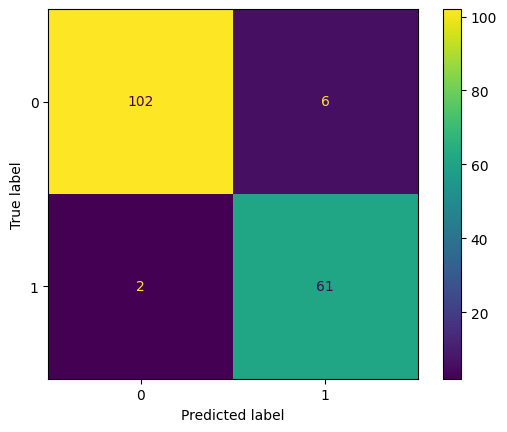

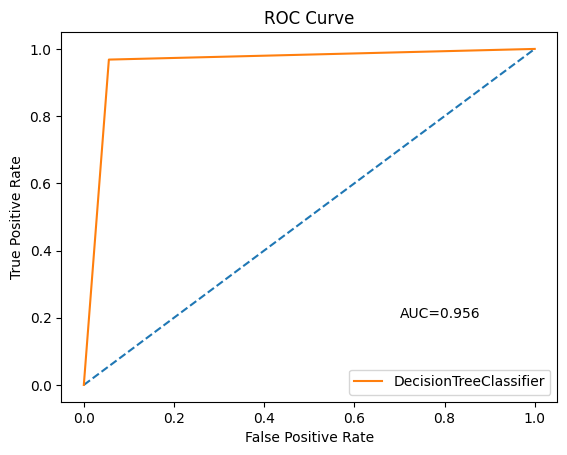



-------------------- LogisticRegression --------------------
Accuracy Score :  0.9707602339181286
Precision Score:  1.0
Recall Score   :  0.9206349206349206


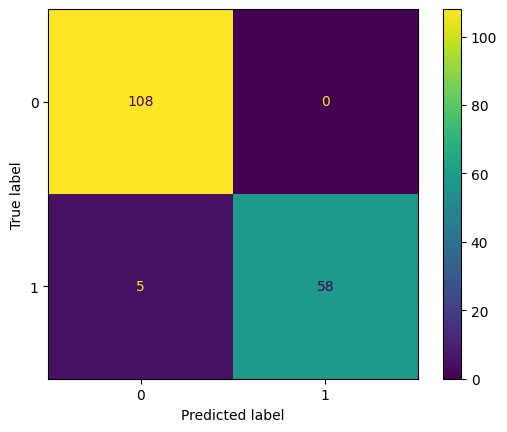

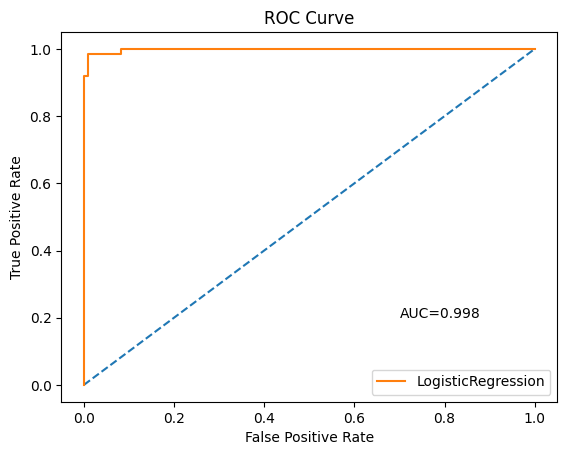

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
rf=RandomForestClassifier(random_state=18,n_estimators=25)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(random_state=42)
models=[knn,rf,dt,lr]
accuracy=[]
model_name=[]
for model in models:
  print('-'*20, type(model).__name__, '-'*20)
  model_name.append(type(model).__name__)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy.append(accuracy_score(y_test,y_pred)*100)
  print("Accuracy Score : ",accuracy_score(y_test,y_pred))
  print("Precision Score: ",precision_score(y_test,y_pred))
  print("Recall Score   : ",recall_score(y_test,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
  plt.show()

  print('\n')

  y_pred_prob=model.predict_proba(X_test)[:,1]
  fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
  auc_=auc(fpr,tpr)
  plt.plot([0,1],[0,1],'--')
  plt.plot(fpr,tpr,label=type(model).__name__)
  plt.text(0.7,0.2,f'AUC={auc_:.3f}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()

  print('\n')

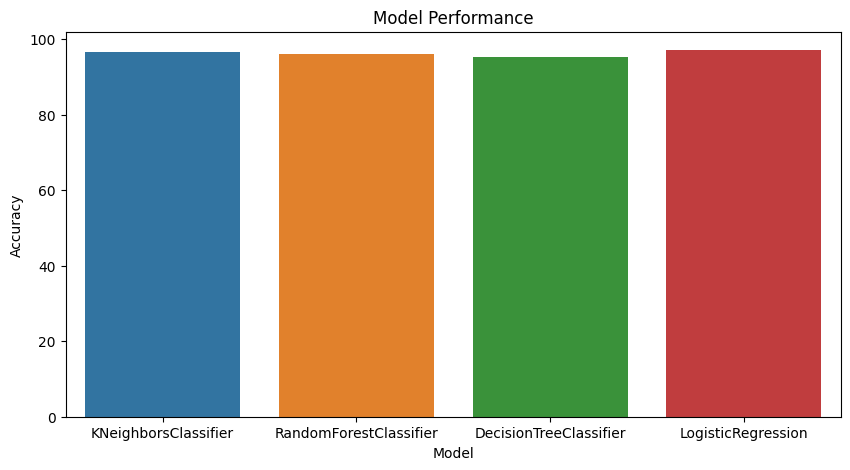

In [ ]:
df_1=pd.DataFrame({'Model':model_name,'Accuracy':accuracy})
plt.figure(figsize=(10,5))
plt.title("Model Performance")
sns.barplot(x='Model',y='Accuracy',data=df_1,hue='Model',)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

**INFERENCE**
 Here Logistic Regression have better accuracy than other models so


In [ ]:
# Logistic Regression have better accuracy than other models so we are predicting new observation using Logistic Regression

**Predicting New Review sentiment**

In [ ]:
X.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,1.095,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
df['diagnosis'][0]

1

*   malignant-1
*   benign-0

In [ ]:
lst=X.iloc[[0]]

In [ ]:
#Predicting New Value
y_pred_new=lr.predict(scaler.transform(lst))
if y_pred_new.item() == 1:
  print("Malignant")
else:
  print("Benign")

Malignant
